## 高级操作
- gather
- gather_nd
- where
- boolean_mask
- scatter_nd
- meshgrid
------

In [7]:
import tensorflow as tf

# 1  tf.gather
`tf.gather` 是 TensorFlow 中用于从张量的指定轴上收集切片的操作。它可以根据索引从输入张量中提取特定的元素或切片。

### 示例代码

In [8]:
# 定义一个张量
tensor = tf.constant([[1, 2], [3, 4], [5, 6]])

# 使用 tf.gather 提取指定索引的行
result = tf.gather(tensor, indices=[0, 2], axis=0)

print("原始张量：", tensor.numpy())
print("提取结果：", result.numpy())

原始张量： [[1 2]
 [3 4]
 [5 6]]
提取结果： [[1 2]
 [5 6]]


# 2  tf.gather_nd
`tf.gather_nd` 是 TensorFlow 中用于从张量中提取多维索引指定的元素的操作。与 `tf.gather` 不同，`tf.gather_nd` 可以处理多维索引，从而实现更灵活的元素提取。

### 示例代码

In [9]:
# 定义一个张量
tensor = tf.constant([[1, 2], [3, 4], [5, 6]])

# 使用 tf.gather_nd 提取指定索引的元素
indices = [[0, 0], [2, 1]]  # 指定索引
result_nd = tf.gather_nd(tensor, indices)

print("原始张量：", tensor.numpy())
print("提取结果：", result_nd.numpy())

原始张量： [[1 2]
 [3 4]
 [5 6]]
提取结果： [1 6]


### 总结
`tf.gather_nd` 提供了一种灵活的方式来从张量中提取元素，适用于需要多维索引的场景。

# 3  tf.where
`tf.where` 是 TensorFlow 中用于条件选择的操作。它可以根据给定的条件，从两个张量中选择对应位置的元素，或者返回满足条件的元素的索引。

### 示例代码
以下是一个使用 `tf.where` 的示例代码：

In [10]:
# 定义一个张量
tensor = tf.constant([[1, 2], [3, 4], [5, 6]])

# 定义条件：选择大于 3 的元素
condition = tensor > 3

# 使用 tf.where 返回满足条件的元素索引
indices_where = tf.where(condition)

# 使用 tf.where 根据条件选择元素
result_where = tf.where(condition, tensor, tf.zeros_like(tensor))

print("原始张量：\n", tensor.numpy())
print("条件：> 3 \n", condition.numpy())
print("满足条件的索引：\n", indices_where.numpy())
print("根据条件选择的结果：\n", result_where.numpy())

原始张量：
 [[1 2]
 [3 4]
 [5 6]]
条件：> 3 
 [[False False]
 [False  True]
 [ True  True]]
满足条件的索引：
 [[1 1]
 [2 0]
 [2 1]]
根据条件选择的结果：
 [[0 0]
 [0 4]
 [5 6]]


### 总结
`tf.where` 提供了一种灵活的方式来根据条件选择元素或获取满足条件的索引，适用于需要条件判断的场景。

# 4  tf.boolean_mask
`tf.boolean_mask` 是 TensorFlow 中用于根据布尔掩码选择张量中特定元素的操作。它可以通过布尔条件筛选张量的部分数据。

### 示例代码

In [11]:
# 定义一个张量
tensor = tf.constant([[1, 2], [3, 4], [5, 6]])

# 定义布尔掩码
mask = tf.constant([[False, True], [True, False], [True, True]])

# 使用 tf.boolean_mask 筛选元素
result_boolean_mask = tf.boolean_mask(tensor, mask)

print("原始张量：\n", tensor.numpy())
print("布尔掩码：\n", mask.numpy())
print("筛选结果：\n", result_boolean_mask.numpy())

原始张量：
 [[1 2]
 [3 4]
 [5 6]]
布尔掩码：
 [[False  True]
 [ True False]
 [ True  True]]
筛选结果：
 [2 3 5 6]


# 5  tf.scatter_nd
`tf.scatter_nd` 是 TensorFlow 中用于根据索引更新张量的操作。它可以通过指定的索引和更新值创建或修改张量。

### 示例代码

In [12]:
# 定义索引和更新值
indices = [[0], [2]]
updates = [7, 8]

# 使用 tf.scatter_nd 创建一个新张量
shape = [4]  # 指定张量的形状
result_scatter_nd = tf.scatter_nd(indices, updates, shape)

print("索引：\n", indices)
print("更新值：\n", updates)
print("结果张量：\n", result_scatter_nd.numpy())


索引：
 [[0], [2]]
更新值：
 [7, 8]
结果张量：
 [7 0 8 0]


# 6  tf.meshgrid
`tf.meshgrid` 是 TensorFlow 中用于生成网格点的操作。它通常用于多维坐标系的生成，例如在绘制曲面图时。

### 示例代码

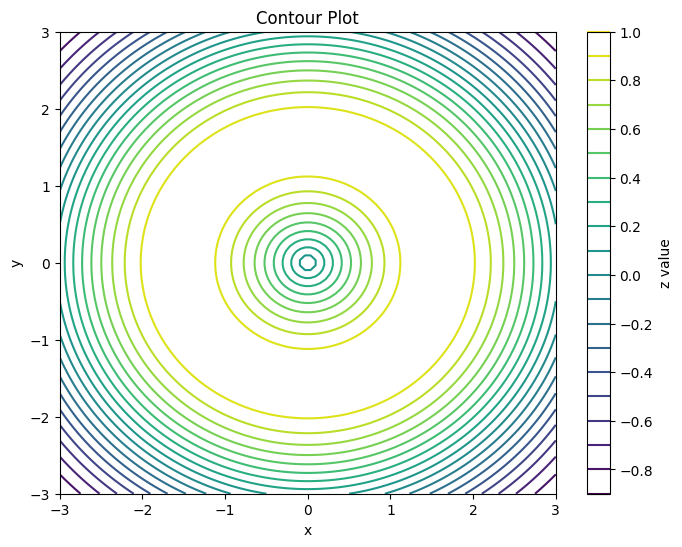

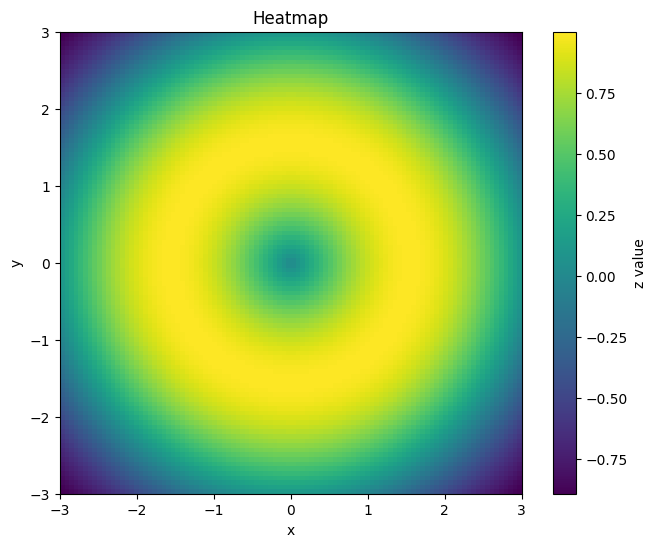

In [ ]:
import matplotlib.pyplot as plt

# 使用 meshgrid 生成网格
x = tf.linspace(-3.0, 3.0, 100)
y = tf.linspace(-3.0, 3.0, 100)
grid_x, grid_y = tf.meshgrid(x, y)

# 定义一个函数 z = sin(sqrt(x^2 + y^2))
z = tf.sin(tf.sqrt(grid_x**2 + grid_y**2))

# 绘制等高线图
plt.figure(figsize=(8, 6))  # 设置图形大小
plt.contour(grid_x.numpy(), grid_y.numpy(), z.numpy(), levels=20, cmap='viridis')  # 绘制等高线图
plt.colorbar(label='z value')  # 添加颜色条并设置标签
plt.title('Contour Plot')  # 设置图标题
plt.xlabel('x')  # 设置 x 轴标签
plt.ylabel('y')  # 设置 y 轴标签
plt.show()  # 显示图形

# 绘制云图
plt.figure(figsize=(8, 6))  # 设置图形大小
plt.imshow(z.numpy(), extent=(-3, 3, -3, 3), origin='lower', cmap='viridis')  # 绘制云图
plt.colorbar(label='z value')  # 添加颜色条并设置标签
plt.title('Heatmap')  # 设置图标题
plt.xlabel('x')  # 设置 x 轴标签
plt.ylabel('y')  # 设置 y 轴标签
plt.show()  # 显示图形

### 总结
- `tf.boolean_mask` 用于根据布尔条件筛选张量中的元素。
- `tf.scatter_nd` 用于根据索引更新或创建张量。
- `tf.meshgrid` 用于生成多维网格点，适用于坐标系相关的操作。